f/m = -GMx/r**2

fx/m = - GM/r**2 * cos(theta)
fy/m = - GM/r**2 * sin(theta)

cos(theta) = x/r
sin(theta) = y/r

fx/m = -GMx/r**3
fy/m = -GMy/r**3

#differential equation

d/dt [x y vx vy] = [vx vx ax ay]

v0 = 2PiR / T

In [1]:
# ORbital models

import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [2]:
# u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
# x1   y1   x2   y2   v1x  v1y  v2x  v2y


def orbitModel(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]

    R1 = np.sqrt(u[0]**2 + u[1]**2)  # distance formula - d from planet 1
    R2 = np.sqrt(u[2]**2 + u[3]**2)  # d from planet 2
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    R12 = np.sqrt(dx**2 + dy**2)  # distance between two planets
    q1 = -G*Ms/R1**3
    q2 = -G*Ms/R2**3
    q12 = -G*Mp2/R12**3 # Force coefficient from planet 2 to planet 1
    q21 = -G*Mp1/R12**3 # Force coefficient from planet 1 to planet 2

    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy

    return f


In [3]:
G = 6.67e-11 # m3 * Kg * s-2
Ms = 1.98e30 # Mass of Sun kg
Re = 150e9   # Earth->Sun distance km

Mp1 = Ms*0.001 # 1/1000 Mass of Sun
Mp2 = Mp1
Rp1 = Re
Rp2 = Rp1 * .95

# Orbital velocity w/ Kepler's law
k = (4*np.pi**2) / (G * Ms)
Pp1 = np.sqrt(k * Rp1**3)
Pp2 = np.sqrt(k * Rp2**3)
Vp1 = (2 * np.pi * Rp1) / Pp1 # orbital velocity Planet 1
Vp2 = (2 * np.pi * Rp2) / Pp2 # orbital velocity Planet 2

In [4]:
# u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
# x1   y1   x2   y2   v1x  v1y  v2x  v2y

u0 = np.zeros((8,)) # initial conditions

# initial positions at 0 on y axis
u0[0] = Rp1
u0[1] = 0
u0[2] = Rp2
u0[3] = 0

# intial vel
u0[4] = 0 # x1 vel 
u0[5] = Vp1 # y1 vel = counterclockwise orbit
u0[6] = 0 # x2 vel
u0[7] = -Vp2 # y2 vel -> opposite direction (clockwise) from x1

Text(0, 0.5, 'y (km)')

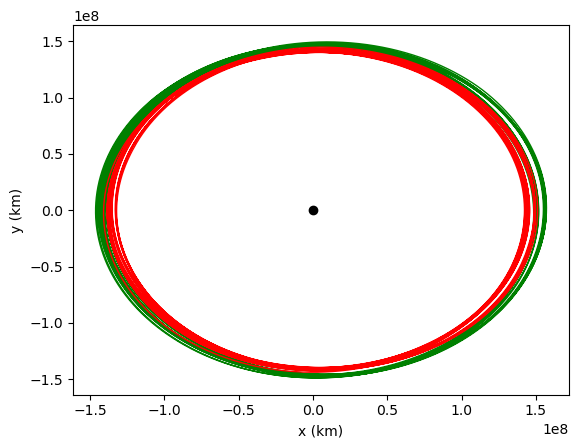

In [5]:
Dt = 360 # 6 minutes in seconds
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax, Dt)

sol = solve_ivp(orbitModel, [t0, tmax], u0, method='DOP853', t_eval=t)

fig1 = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axis = ( [-2e8, 2e8, -2e8, 2e8])
plt.plot(0, 0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) # planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1) # planet 2
plt.xlabel('x (km)')
plt.ylabel('y (km)')

Text(0.5, 0, 'time (s)')

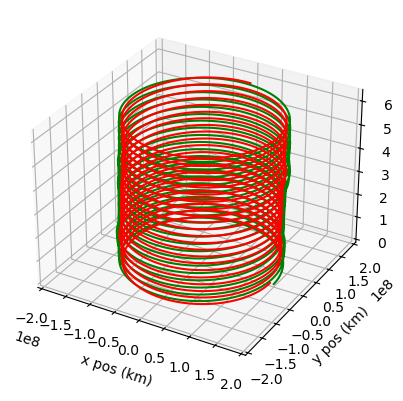

In [6]:
#Plot 3D
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-2e8, 2e8))
ax1.set_ylim((-2e8, 2e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-')
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-')
ax1.set_xlabel('x pos (km)')
ax1.set_ylabel('y pos (km)')
ax1.set_zlabel('time (s)')

Text(0.5, 0, 'time (s)')

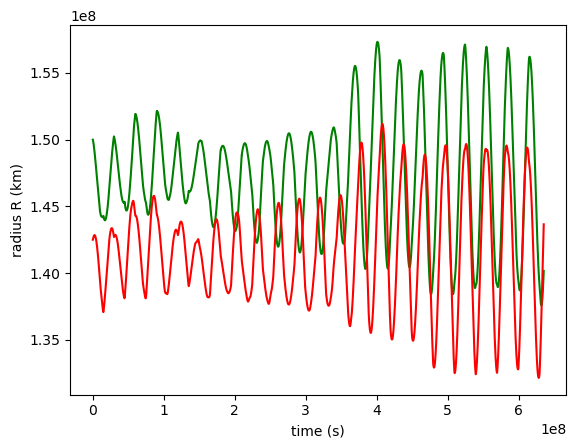

In [7]:
#plot Sun/Planet Distance
Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axis = ( [t0,tmax, 0, 3e8])
plt.plot(t, Rad1/1000, 'g-')
plt.plot(t, Rad2/1000, 'r-')

ax.set_ylabel('radius R (km)')
ax.set_xlabel('time (s)')


Text(0.0704766587855572, 0.5, 'Planetary Distance(km)')

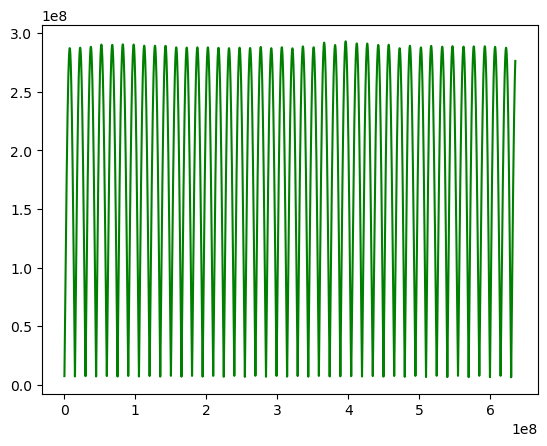

In [8]:
# Plot interplanet distance

deltax = sol.y[0] - sol.y[2]
deltay = sol.y[1] - sol.y[3]

rad12 = np.sqrt(deltax**2 + deltay**2)

fig1 = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(t, rad12/1000, 'g-')

ax1.set_xlabel('time (s)')
ax1.set_ylabel('Planetary Distance(km)')


Text(0.0704766587855572, 0.5, 'Planetary Distance(km)')

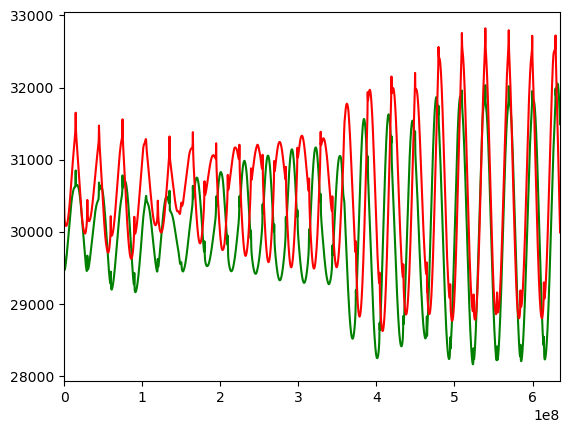

In [9]:
# Plot velocity

vel_p1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)
vel_p2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)

fig1 = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_xlim([t0, tmax])
plt.plot(t, vel_p1, 'g-')
plt.plot(t, vel_p2, 'r-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Planetary Distance(km)')





In [10]:
# Animate orbits

from matplotlib import animation

N, = np.shape(sol.t)
Nframes = 800
Nskip = int(N/Nframes) # there are over 1M data points in the calculation
print(f"Total Data Points: {N}, Desired Frames: {Nframes}, Frame Skip: {Nskip}")

Total Data Points: 1764611, Desired Frames: 800, Frame Skip: 2205


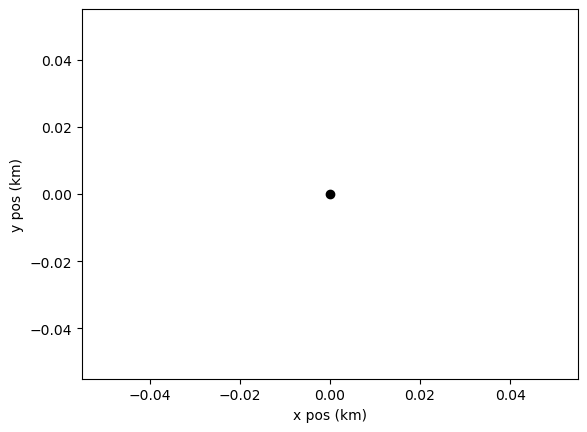

In [11]:
fig = plt.figure()
ax = fig.subplots()
plt.axis = ( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0, 0, 'ko', lw=2)
ax.set_xlabel('x pos (km)')
ax.set_ylabel('y pos (km)')

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return(line1, line2)

def animate(i):
    xp1 = sol.y[0][i*Nskip]/1000
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1, line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetOrbitAnim.gif"
writergif = animation.PillowWriter(fps=30)

#anim.save(f, writer=writergif)

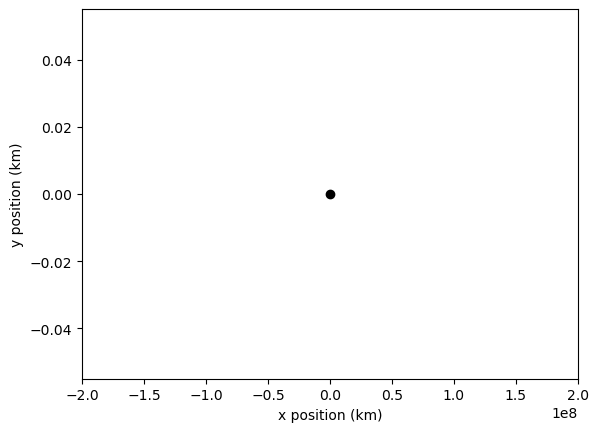

In [12]:
fig = plt.figure()
ax = fig.subplots()
#plt.axis( [-2e8, 2e8, -2e8, 2e8] )
ax.set_xlim(-2e8, 2e8)
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i):
    xp1 = sol.y[0][i*Nskip]/1000
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "lec-11-12_planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)